In [27]:
import numpy as np
import pandas as pd
import hvplot.pandas
from pathlib import Path
import plotly.graph_objects as go
import plotly.express as px 

In [41]:


spy_df = pd.read_csv("spy_data_covid - Sheet1.csv")

spy_df.head()

Date   Close
0  12/2/2019 16:00  311.64
1  12/3/2019 16:00  309.55
2  12/4/2019 16:00  311.46
3  12/5/2019 16:00  312.02
4  12/6/2019 16:00  314.87

In [42]:
signals_df = spy_df.loc[:, ["Date", "Close"]].copy()

short_window = 8
long_window = 20

signals_df = signals_df.set_index("Date", drop=True)


signals_df["SMA8"] = signals_df["Close"].rolling(window=short_window).mean()
signals_df["SMA20"] = signals_df["Close"].rolling(window=long_window).mean()
signals_df["Signal"] = 0.0


signals_df["Signal"] = np.where(
    signals_df["SMA8"] > signals_df["SMA20"], 1.0, 0.0
)


signals_df["Entry/Exit"] = signals_df["Signal"].diff()

signals_df.head(10)



Close       SMA8  SMA20  Signal  Entry/Exit
Date                                                          
12/2/2019 16:00   311.64        NaN    NaN     0.0         NaN
12/3/2019 16:00   309.55        NaN    NaN     0.0         0.0
12/4/2019 16:00   311.46        NaN    NaN     0.0         0.0
12/5/2019 16:00   312.02        NaN    NaN     0.0         0.0
12/6/2019 16:00   314.87        NaN    NaN     0.0         0.0
12/9/2019 16:00   313.88        NaN    NaN     0.0         0.0
12/10/2019 16:00  313.53        NaN    NaN     0.0         0.0
12/11/2019 16:00  314.42  312.67125    NaN     0.0         0.0
12/12/2019 16:00  317.13  313.35750    NaN     0.0         0.0
12/13/2019 16:00  317.32  314.32875    NaN     0.0         0.0

In [43]:
signals_df.iloc[10:150,:]

Close       SMA8     SMA20  Signal  Entry/Exit
Date                                                             
12/16/2019 16:00  319.50  315.33375       NaN     0.0         0.0
12/17/2019 16:00  319.57  316.27750       NaN     0.0         0.0
12/18/2019 16:00  319.59  316.86750       NaN     0.0         0.0
12/19/2019 16:00  320.90  317.74500       NaN     0.0         0.0
12/20/2019 16:00  320.73  318.64500       NaN     0.0         0.0
...                  ...        ...       ...     ...         ...
6/26/2020 16:00   300.05  308.28000  310.5285     0.0         0.0
6/29/2020 16:00   304.46  307.38000  310.4740     0.0         0.0
6/30/2020 16:00   308.36  306.95250  310.4880     0.0         0.0
7/1/2020 16:00    310.52  307.18750  310.4050     0.0         0.0
7/2/2020 16:00    312.23  307.38875  310.4485     0.0         0.0

[138 rows x 5 columns]

In [44]:
signals_df.shape

(148, 5)

In [32]:
Sentiment = []
for i in range (148):
    Sentiment.append(np.random.choice([-1,0,1]))
signals_df['Sentiment'] = Sentiment
signals_df.head()


Close  SMA8  SMA20  Signal  Entry/Exit  Sentiment
Date                                                               
12/2/2019 16:00  311.64   NaN    NaN     0.0         NaN         -1
12/3/2019 16:00  309.55   NaN    NaN     0.0         0.0          1
12/4/2019 16:00  311.46   NaN    NaN     0.0         0.0          1
12/5/2019 16:00  312.02   NaN    NaN     0.0         0.0          0
12/6/2019 16:00  314.87   NaN    NaN     0.0         0.0          1

In [36]:
exit = signals_df[signals_df['Entry/Exit'] == -1.0]['Close'].hvplot.scatter(
    color='red',
    marker='v',
    size=200,
    legend=False,
    ylabel='Price in $',
    width=1000,
    height=400
)


entry = signals_df[signals_df['Entry/Exit'] == 1.0]['Close'].hvplot.scatter(
    color='green',
    marker='^',
    size=200,
    legend=False,
    ylabel='Price in $',
    width=1000,
    height=400
)

security_close = signals_df[['Close']].hvplot(
    line_color='lightgray',
    ylabel='Price in $',
    width=1000,
    height=400
)


moving_avgs = signals_df[['SMA8', 'SMA20']].hvplot(
    ylabel='Price in $',
    width=1000,
    height=400
)
    
    


entry_exit_plot = security_close * moving_avgs * entry * exit
entry_exit_plot.opts(xaxis=None)



:Overlay
   .Curve.I          :Curve   [Date]   (Close)
   .NdOverlay.I      :NdOverlay   [Variable]
      :Curve   [Date]   (value)
   .Scatter.Close.I  :Scatter   [Date]   (Close)
   .Scatter.Close.II :Scatter   [Date]   (Close)

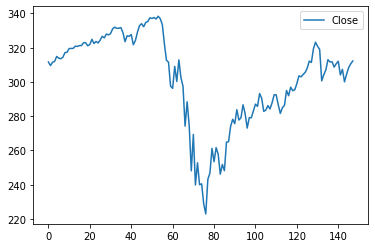

In [37]:
spy_df.plot()

In [38]:
sent_plot = signals_df["Sentiment"].hvplot(width = 1000, height = 200)
sent_plot

:Curve   [Date]   (Sentiment)

In [39]:
plotly_df = signals_df.reset_index()
fig = px.line(plotly_df, x = 'Date', y = 'Close')
fig.update_xaxes(rangeslider_visible = True)
fig.write_image('fig1.png')

In [40]:
(entry_exit_plot + sent_plot).cols(1)

:Layout
   .Overlay.I       :Overlay
      .Curve.I          :Curve   [Date]   (Close)
      .NdOverlay.I      :NdOverlay   [Variable]
         :Curve   [Date]   (value)
      .Scatter.Close.I  :Scatter   [Date]   (Close)
      .Scatter.Close.II :Scatter   [Date]   (Close)
   .Curve.Sentiment :Curve   [Date]   (Sentiment)